### **===== SECTION 1: DATA LOADING & EXPLORATION =====**

In [3]:
# ===== IMPORT LIBRARIES =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# For better visualization style
sns.set(style='whitegrid')

In [4]:
# ===== SECTION 1: LOAD DATASET =====
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Leads.csv')

print(f"Dataset shape: {df.shape}")
print("Data types of columns:")
print(df.dtypes)
print("\nSample data:")
print(df.head())

Saving Leads.csv to Leads.csv
Dataset shape: (9240, 37)
Data types of columns:
Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search   

### **===== SECTION 2: DATA QUALITY CHECKS =====**

In [5]:
# 1. Missing Values Check
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing %': missing_percent}).sort_values(by='Missing %', ascending=False)
print("\nMissing values (counts and percentages):")
print(missing_df)


Missing values (counts and percentages):
                                               Missing Count  Missing %
Lead Quality                                            4767  51.590909
Asymmetrique Profile Index                              4218  45.649351
Asymmetrique Activity Score                             4218  45.649351
Asymmetrique Activity Index                             4218  45.649351
Asymmetrique Profile Score                              4218  45.649351
Tags                                                    3353  36.287879
What matters most to you in choosing a course           2709  29.318182
Lead Profile                                            2709  29.318182
What is your current occupation                         2690  29.112554
Country                                                 2461  26.634199
How did you hear about X Education                      2207  23.885281
Specialization                                          1438  15.562771
City                  

In [6]:
# 2. Handling 'Select' Values in Categorical Columns
categorical_columns = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical columns identified:", categorical_columns)
for col in categorical_columns:
    select_count = (df[col] == 'Select').sum()
    if select_count > 0:
        print(f"Column '{col}' has {select_count} 'Select' values, replacing with NaN.")
        df[col].replace('Select', np.nan, inplace=True)


Categorical columns identified: ['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']
Column 'Specialization' has 1942 'Select' values, replacing with NaN.
Column 'How did you hear about X Education' has 5043 'Select' values, replacing with NaN.
Column 'Lead Profile' has 4146 'Select' values, replacing with NaN.
Column 'City' has 2249 'Select' valu

/tmp/ipython-input-3421508008.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace('Select', np.nan, inplace=True)


In [7]:
# 3. Duplicate Rows Check
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Duplicates dropped. New data shape: {df.shape}")



Number of duplicate rows: 0


### **===== SECTION 3: MISSING VALUE IMPUTATION =====**

In [8]:
# For categorical features, impute with mode
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Missing values in '{col}' filled with mode: '{mode_val}'.")


Missing values in 'Lead Source' filled with mode: 'Google'.
Missing values in 'Last Activity' filled with mode: 'Email Opened'.
Missing values in 'Country' filled with mode: 'India'.
Missing values in 'Specialization' filled with mode: 'Finance Management'.
Missing values in 'How did you hear about X Education' filled with mode: 'Online Search'.
Missing values in 'What is your current occupation' filled with mode: 'Unemployed'.
Missing values in 'What matters most to you in choosing a course' filled with mode: 'Better Career Prospects'.
Missing values in 'Tags' filled with mode: 'Will revert after reading the email'.
Missing values in 'Lead Quality' filled with mode: 'Might be'.
Missing values in 'Lead Profile' filled with mode: 'Potential Lead'.
Missing values in 'City' filled with mode: 'Mumbai'.
Missing values in 'Asymmetrique Activity Index' filled with mode: '02.Medium'.
Missing values in 'Asymmetrique Profile Index' filled with mode: '02.Medium'.


/tmp/ipython-input-254220911.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


In [9]:
# For numerical features, impute with median
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_columns:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Missing values in '{col}' filled with median: {median_val}.")


Missing values in 'TotalVisits' filled with median: 3.0.
Missing values in 'Page Views Per Visit' filled with median: 2.0.
Missing values in 'Asymmetrique Activity Score' filled with median: 14.0.
Missing values in 'Asymmetrique Profile Score' filled with median: 16.0.


/tmp/ipython-input-1147907990.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


### **===== SECTION 4: DUMMY VARIABLE CREATION =====**

In [10]:
df_model = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(f"\nShape after dummy variable creation: {df_model.shape}")


Shape after dummy variable creation: (9240, 9421)


### **===== SECTION 5: NEW METRICS DERIVATION =====**

In [11]:
# Metric 1: Average Time Spent per Visit
df_model['Avg_Time_Per_Visit'] = df_model['Total Time Spent on Website'] / (df_model['TotalVisits'] + 1)
print("Derived 'Avg_Time_Per_Visit' metric.")


Derived 'Avg_Time_Per_Visit' metric.


In [12]:
# Metric 2: Engagement Score (normalized total time + visits)
max_time = df_model['Total Time Spent on Website'].max()
max_visits = df_model['TotalVisits'].max()
df_model['Engagement_Score'] = ((df_model['Total Time Spent on Website'] / max_time) * 0.5 + (df_model['TotalVisits'] / max_visits) * 0.5) * 100
print("Derived 'Engagement_Score' metric.")

Derived 'Engagement_Score' metric.


### **===== SECTION 6: FINAL DATA VERIFICATION =====**

In [13]:
missing_after = df_model.isnull().sum().sum()
print(f"\nTotal missing values after cleaning: {missing_after}")


Total missing values after cleaning: 0


### **===== SECTION 7: VISUALIZATIONS =====**

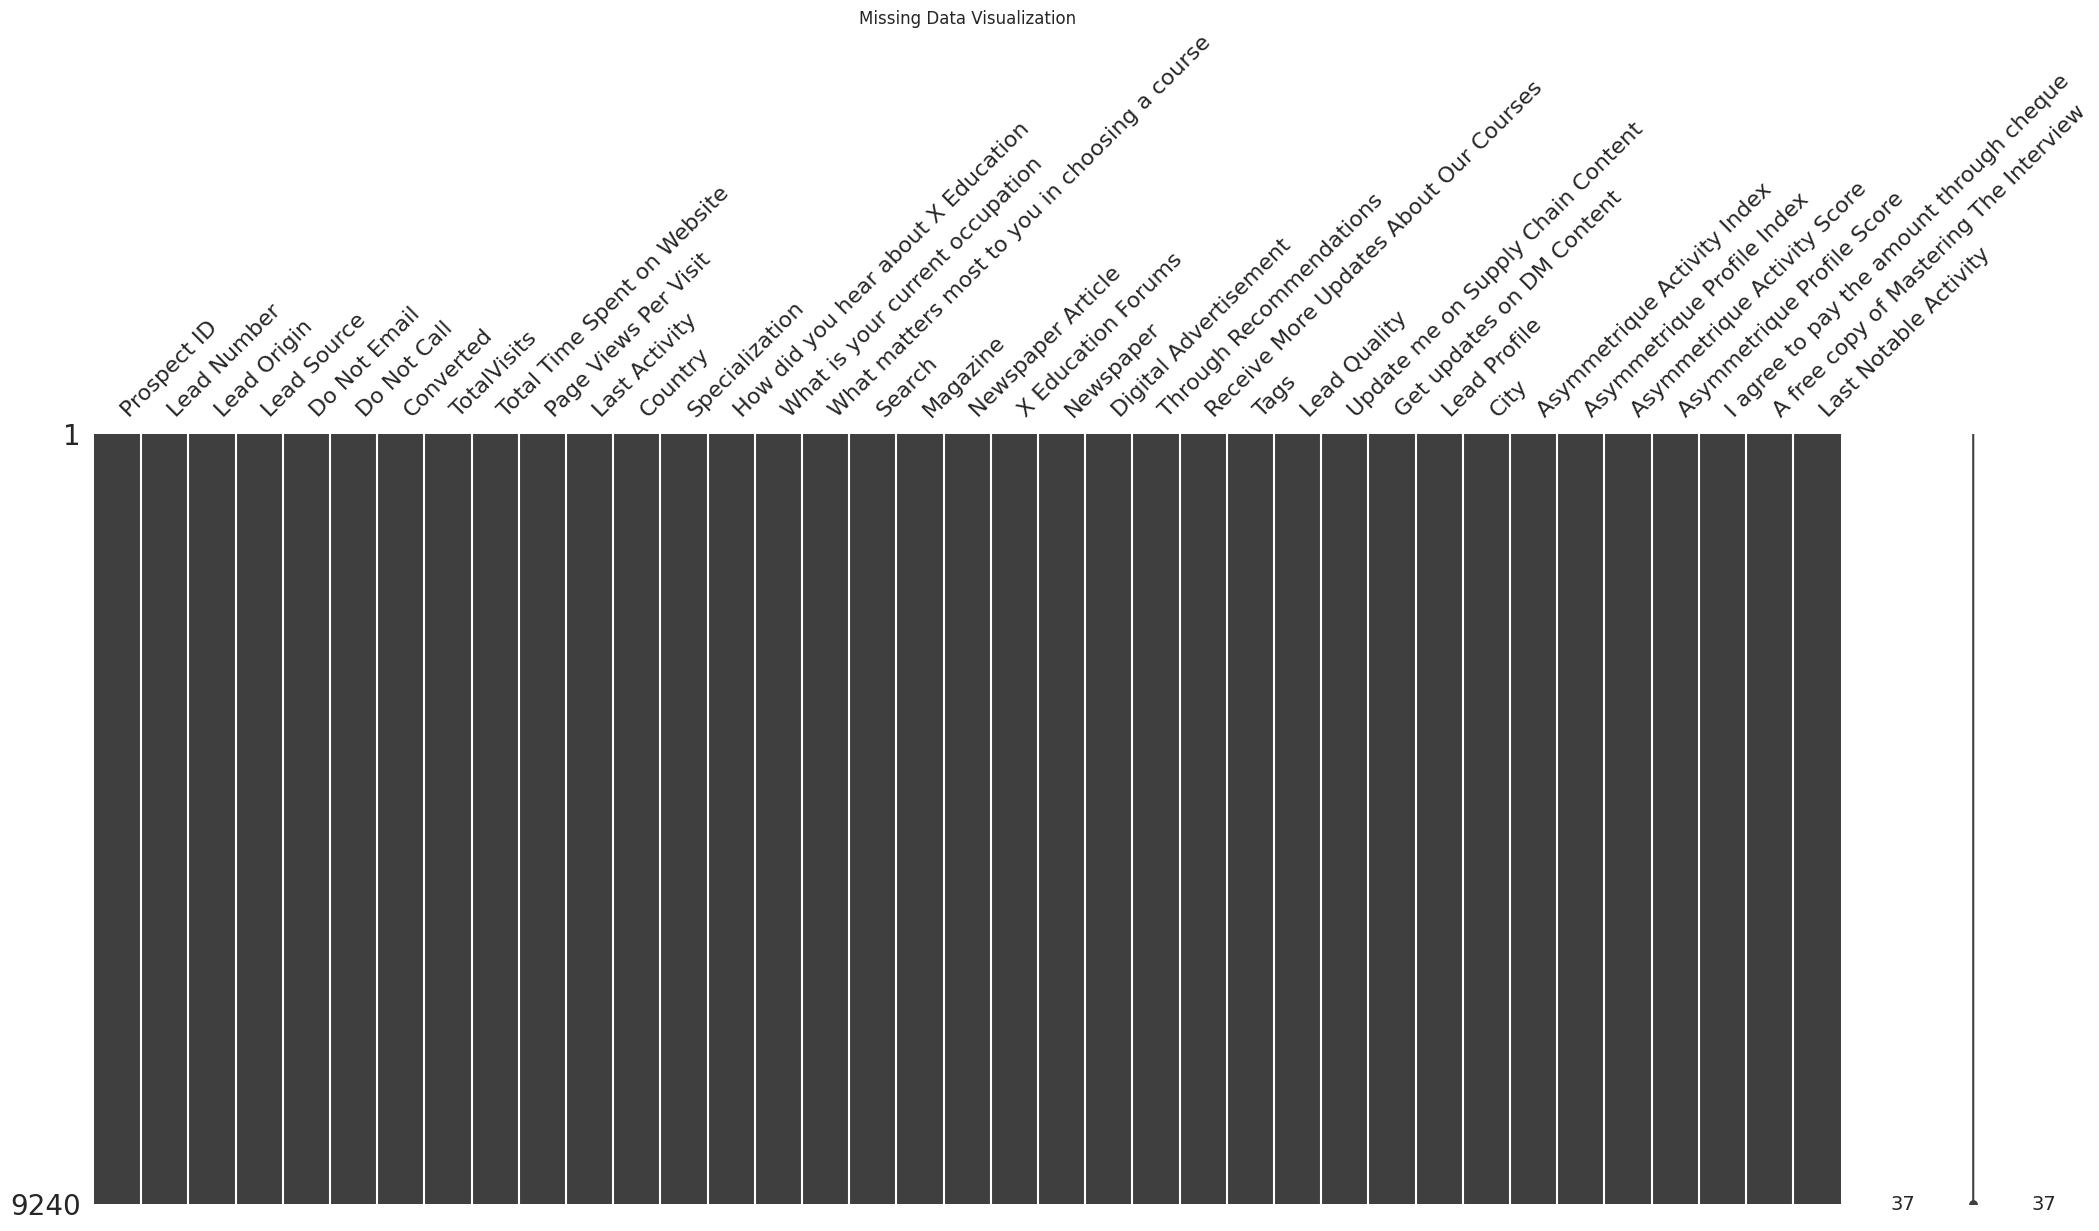

In [14]:
# Missing values matrix
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

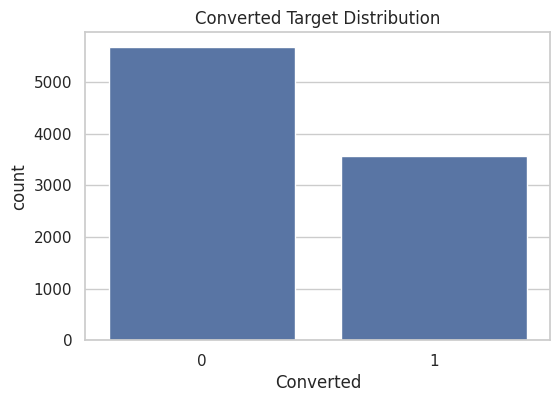

In [15]:
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Converted', data=df)
plt.title('Converted Target Distribution')
plt.show()

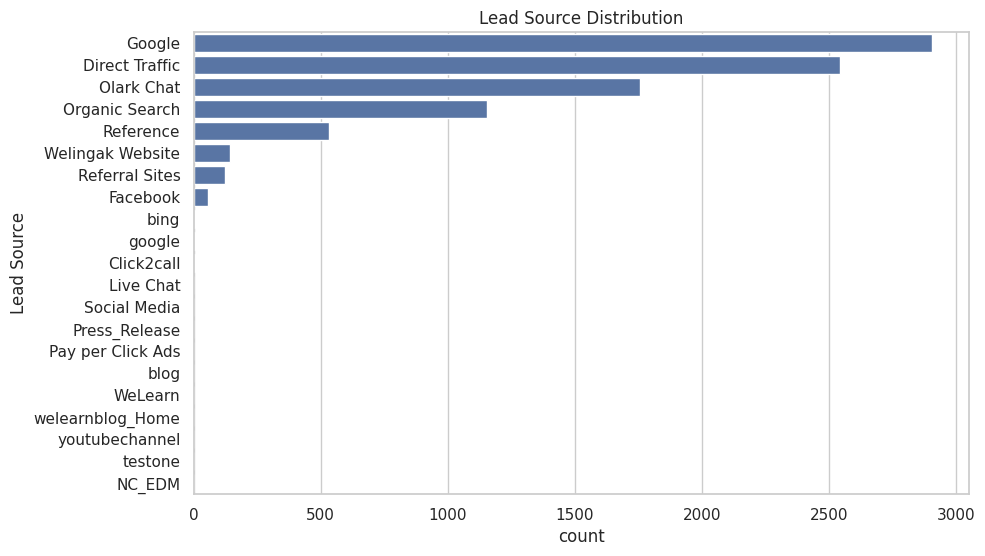

In [16]:
# Lead Source distribution (original dataframe since categorical)
plt.figure(figsize=(10, 6))
sns.countplot(y='Lead Source', data=df, order=df['Lead Source'].value_counts().index)
plt.title('Lead Source Distribution')
plt.show()

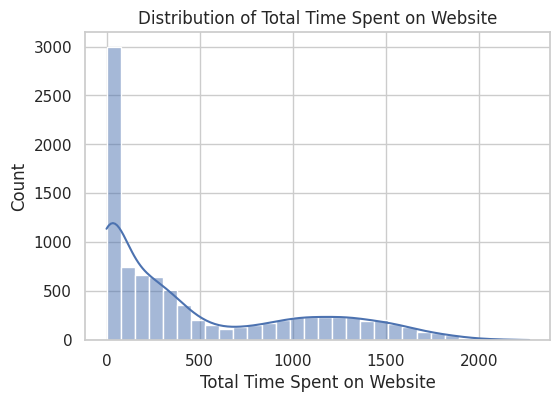

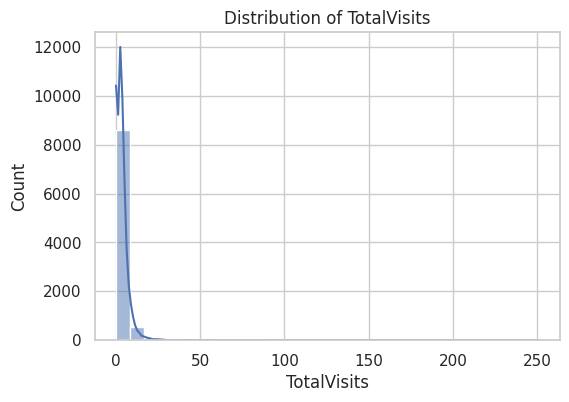

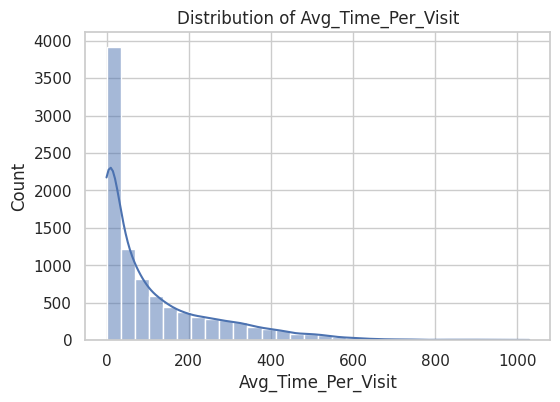

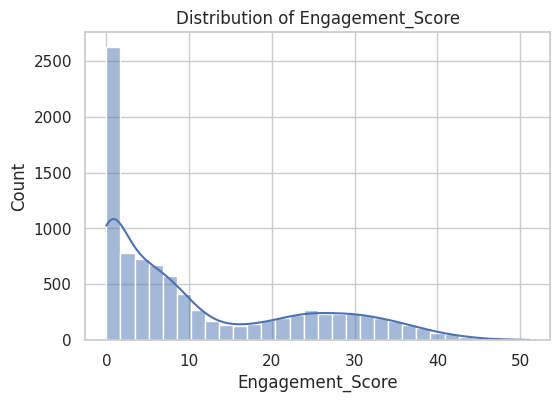

In [17]:
# Numerical features distribution
numerical_features = ['Total Time Spent on Website', 'TotalVisits', 'Avg_Time_Per_Visit', 'Engagement_Score']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_model[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

### **===== SECTION 8: MODEL BUILDING & EVALUATION =====**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Define features and target
X = df_model.drop('Converted', axis=1)
y = df_model['Converted']

In [20]:
# Train-test split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Train target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test target distribution:\n{y_test.value_counts(normalize=True)}")


Train shape: (6468, 9422), Test shape: (2772, 9422)
Train target distribution:
Converted
0    0.614564
1    0.385436
Name: proportion, dtype: float64
Test target distribution:
Converted
0    0.614719
1    0.385281
Name: proportion, dtype: float64


In [21]:
# Function to evaluate and print model metrics
def evaluate_model(name, y_true, y_pred, y_proba):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)
    print(f"\n{name} Model Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    return {'Model': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1, 'ROC_AUC': roc_auc}


In [22]:
# 1. Baseline Logistic Regression
lr_baseline = LogisticRegression(max_iter=1000, random_state=42)
lr_baseline.fit(X_train, y_train)

y_pred_lr = lr_baseline.predict(X_test)
y_proba_lr = lr_baseline.predict_proba(X_test)[:,1]

baseline_metrics = evaluate_model('Logistic Regression Baseline', y_test, y_pred_lr, y_proba_lr)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Baseline Model Performance:
Accuracy: 0.8705
Precision: 0.8577
Recall: 0.7959
F1 Score: 0.8256
ROC-AUC: 0.9278


In [23]:
# 2. Logistic Regression with Class Weights to handle imbalance
lr_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_balanced.fit(X_train, y_train)

y_pred_balanced = lr_balanced.predict(X_test)
y_proba_balanced = lr_balanced.predict_proba(X_test)[:,1]

balanced_metrics = evaluate_model('Logistic Regression Balanced', y_test, y_pred_balanced, y_proba_balanced)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Balanced Model Performance:
Accuracy: 0.8777
Precision: 0.8287
Recall: 0.8605
F1 Score: 0.8443
ROC-AUC: 0.9378


In [24]:
# 3. Random Forest Classifier - Alternative Model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

rf_metrics = evaluate_model('Random Forest', y_test, y_pred_rf, y_proba_rf)



Random Forest Model Performance:
Accuracy: 0.9062
Precision: 0.8976
Recall: 0.8539
F1 Score: 0.8752
ROC-AUC: 0.9654


In [25]:
# Compare models in a DataFrame
import pandas as pd

metrics_df = pd.DataFrame([baseline_metrics, balanced_metrics, rf_metrics])
print("\nModel Comparison:")
print(metrics_df.sort_values(by='ROC_AUC', ascending=False))


Model Comparison:
                          Model  Accuracy  Precision    Recall        F1  \
2                 Random Forest  0.906205   0.897638  0.853933  0.875240   
1  Logistic Regression Balanced  0.877706   0.828674  0.860487  0.844281   
0  Logistic Regression Baseline  0.870491   0.857719  0.795880  0.825644   

    ROC_AUC  
2  0.965364  
1  0.937832  
0  0.927765  


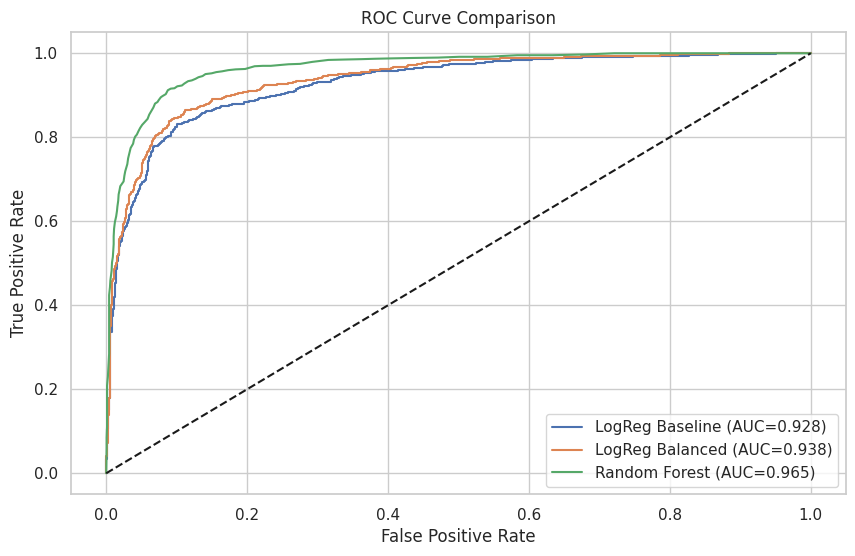

In [26]:
# Plot ROC Curve for all 3 models
plt.figure(figsize=(10,6))

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_bal, tpr_bal, _ = roc_curve(y_test, y_proba_balanced)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.plot(fpr_lr, tpr_lr, label=f'LogReg Baseline (AUC={baseline_metrics["ROC_AUC"]:.3f})')
plt.plot(fpr_bal, tpr_bal, label=f'LogReg Balanced (AUC={balanced_metrics["ROC_AUC"]:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={rf_metrics["ROC_AUC"]:.3f})')

plt.plot([0,1],[0,1],'k--') # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


Best model based on ROC-AUC: Random Forest


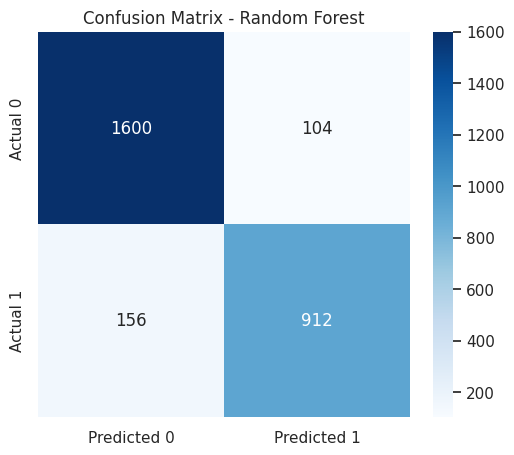

In [27]:
# Confusion Matrix for best model (highest ROC_AUC)
best_model_name = metrics_df.loc[metrics_df['ROC_AUC'].idxmax(),'Model']
print(f"\nBest model based on ROC-AUC: {best_model_name}")

if best_model_name == 'Logistic Regression Baseline':
    best_model = lr_baseline
    ypred_best = y_pred_lr
elif best_model_name == 'Logistic Regression Balanced':
    best_model = lr_balanced
    ypred_best = y_pred_balanced
else:
    best_model = rf
    ypred_best = y_pred_rf

cm = confusion_matrix(y_test, ypred_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

In [28]:
# Feature importance for Logistic Regression best model
if 'Logistic Regression' in best_model_name:
    importance = pd.Series(best_model.coef_[0], index=X.columns).sort_values(ascending=False).head(10)
    print("\nTop 10 important features:")
    print(importance)
    plt.figure(figsize=(8,6))
    importance.plot(kind='bar')
    plt.title(f'Top 10 Feature Coefficients - {best_model_name}')
    plt.show()

### **===== SECTION 9: LEAD SCORING & THRESHOLD OPTIMIZATION =====**

In [29]:
import numpy as np

# Get predicted probabilities on the entire dataset
X_all = df_model.drop('Converted', axis=1)
pred_proba_all = best_model.predict_proba(X_all)[:, 1]


In [30]:
# Convert to lead scores 0-100
lead_scores = pred_proba_all * 100

df['Lead_Score'] = lead_scores

In [31]:
# Categorize leads based on scores
def categorize_lead(score):
    if score >= 80:
        return 'Hot'
    elif score >= 50:
        return 'Warm'
    else:
        return 'Cold'

df['Lead_Category'] = df['Lead_Score'].apply(categorize_lead)

In [32]:
# Count distribution of leads by category
print("\nLead category distribution:")
print(df['Lead_Category'].value_counts(normalize=True) * 100)


Lead category distribution:
Lead_Category
Cold    61.883117
Hot     30.281385
Warm     7.835498
Name: proportion, dtype: float64


In [33]:
# Calculate actual conversion rates in each category
for cat in ['Hot', 'Warm', 'Cold']:
    subset = df[df['Lead_Category'] == cat]
    conv_rate = subset['Converted'].mean() * 100
    print(f"Conversion rate for {cat} leads: {conv_rate:.2f}%")

Conversion rate for Hot leads: 99.39%
Conversion rate for Warm leads: 87.29%
Conversion rate for Cold leads: 2.59%


In [34]:
# Threshold optimization to achieve ~80% conversion in 'Hot' leads
thresholds = np.arange(0.5, 1.0, 0.01)
best_threshold = 0.5
best_conversion_rate = 0

for thresh in thresholds:
    predicted_hot = df[df['Lead_Score'] >= thresh * 100]
    if len(predicted_hot) == 0:
        continue
    conversion_rate = predicted_hot['Converted'].mean()
    if conversion_rate >= 0.8:
        best_threshold = thresh
        best_conversion_rate = conversion_rate
        break

print(f"\nOptimal threshold for ~80% conversion rate: {best_threshold}")
print(f"Conversion rate at optimal threshold: {best_conversion_rate:.2f}")


Optimal threshold for ~80% conversion rate: 0.5
Conversion rate at optimal threshold: 0.97


In [35]:
# Update lead category assignment with optimized threshold
df['Lead_Category_Optimized'] = df['Lead_Score'].apply(lambda x: 'Hot' if x >= best_threshold*100 else 'Not Hot')

In [36]:
# Show updated counts
print("\nUpdated lead category counts with optimized threshold:")
print(df['Lead_Category_Optimized'].value_counts())



Updated lead category counts with optimized threshold:
Lead_Category_Optimized
Not Hot    5718
Hot        3522
Name: count, dtype: int64


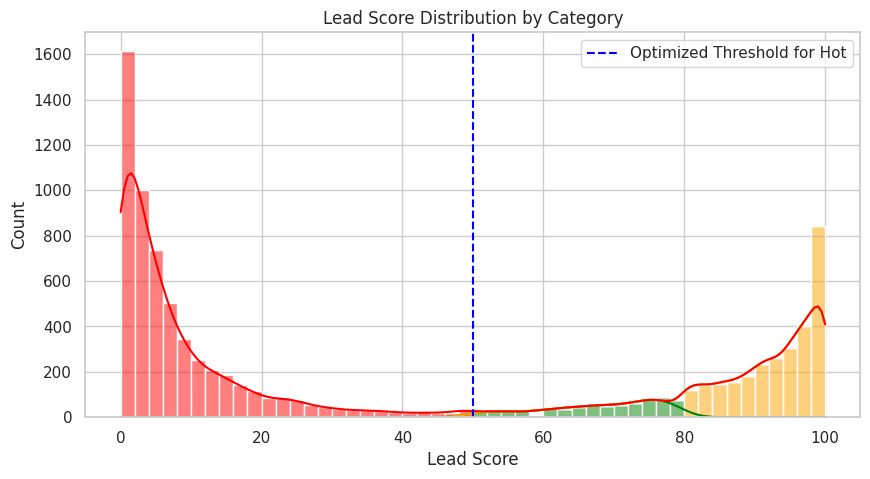

In [37]:
# Visualize lead score distribution and categories
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Lead_Score', bins=50, kde=True, hue='Lead_Category', multiple='stack', palette=['red', 'orange', 'green'])
plt.title('Lead Score Distribution by Category')
plt.xlabel('Lead Score')
plt.ylabel('Count')
plt.axvline(x=best_threshold*100, color='blue', linestyle='--', label='Optimized Threshold for Hot')
plt.legend()
plt.show()